#  PySOQCS Example 3: CSign

   Example of a the calculation of the output of a CSign.<br>


## Description:

<p style='text-align: justify;'> We use SOQCS to simulate a CSign circuit as described in ref.[1]. </p>

[1]  E. Knill, R. Laflamme, G. J. Milburn, A scheme for efficient quantum computation with linear optics, **Nature 409 46-52** (2001)



## Code:

Import SOQCS and initialize the simualtor.

In [1]:
import pysoqcs as soqcs

sim=soqcs.simulator(mem=10000)

### CSign circuit

<p style='text-align: justify;'> CSign circuit declaration. <br> </p>

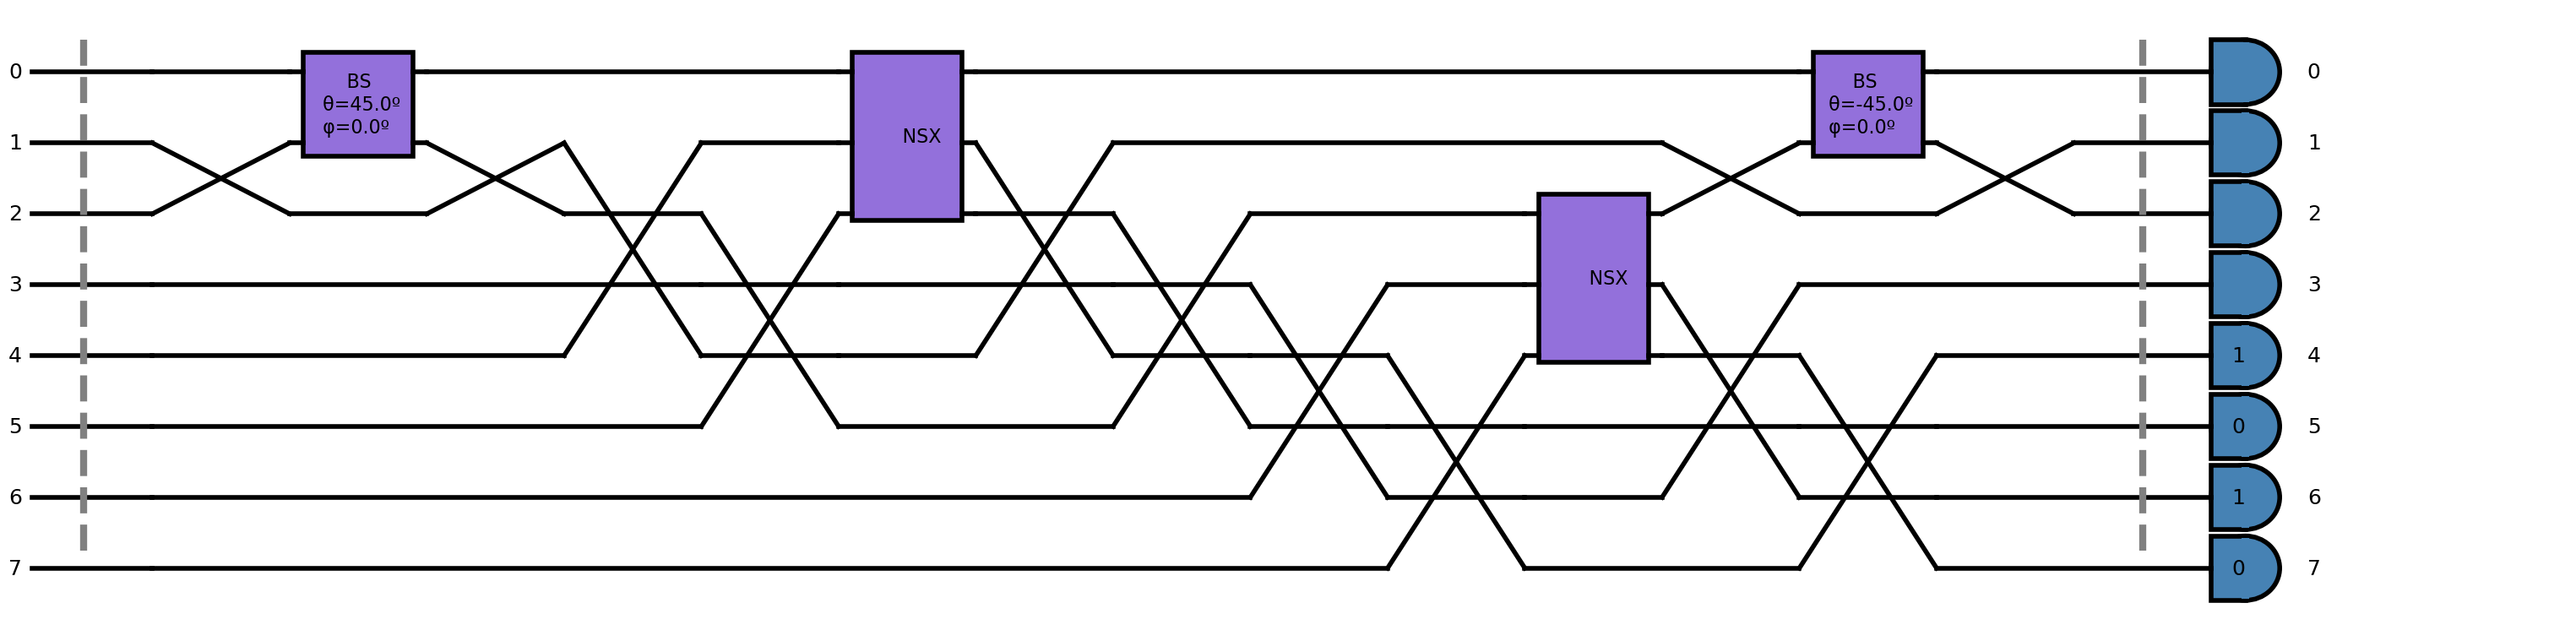

In [2]:
csign = soqcs.qodev(3,8)
csign.separator()
csign.beamsplitter(0,2,45.0,0.0)
csign.NSX(0, 4, 5)
csign.NSX(2, 6, 7)
csign.beamsplitter(0,2,-45.0,0.0)
csign.separator()
csign.detector(0)
csign.detector(1)
csign.detector(2)
csign.detector(3)
csign.detector(4,1)
csign.detector(5,0)
csign.detector(6,1)
csign.detector(7,0)
csign.show(depth=20)


### Input declaration

In this case we will define the input assigning to the circuit the intended qubit values. Qubit representation is then translated into a path encoded photon initialization. First, we need to define the qubit - photon channel correspondence:

In [3]:
qmap=[[0, 2],
      [1, 3]]

### Example with | 1, 1 > input.

Circuit with the input photons definition. <br>
<br>
**Note:** Anzilla photons have to be included in the circuit with the input declarartion. In general, anzilla channels may not not have an equivalent anzilla qubit representation.

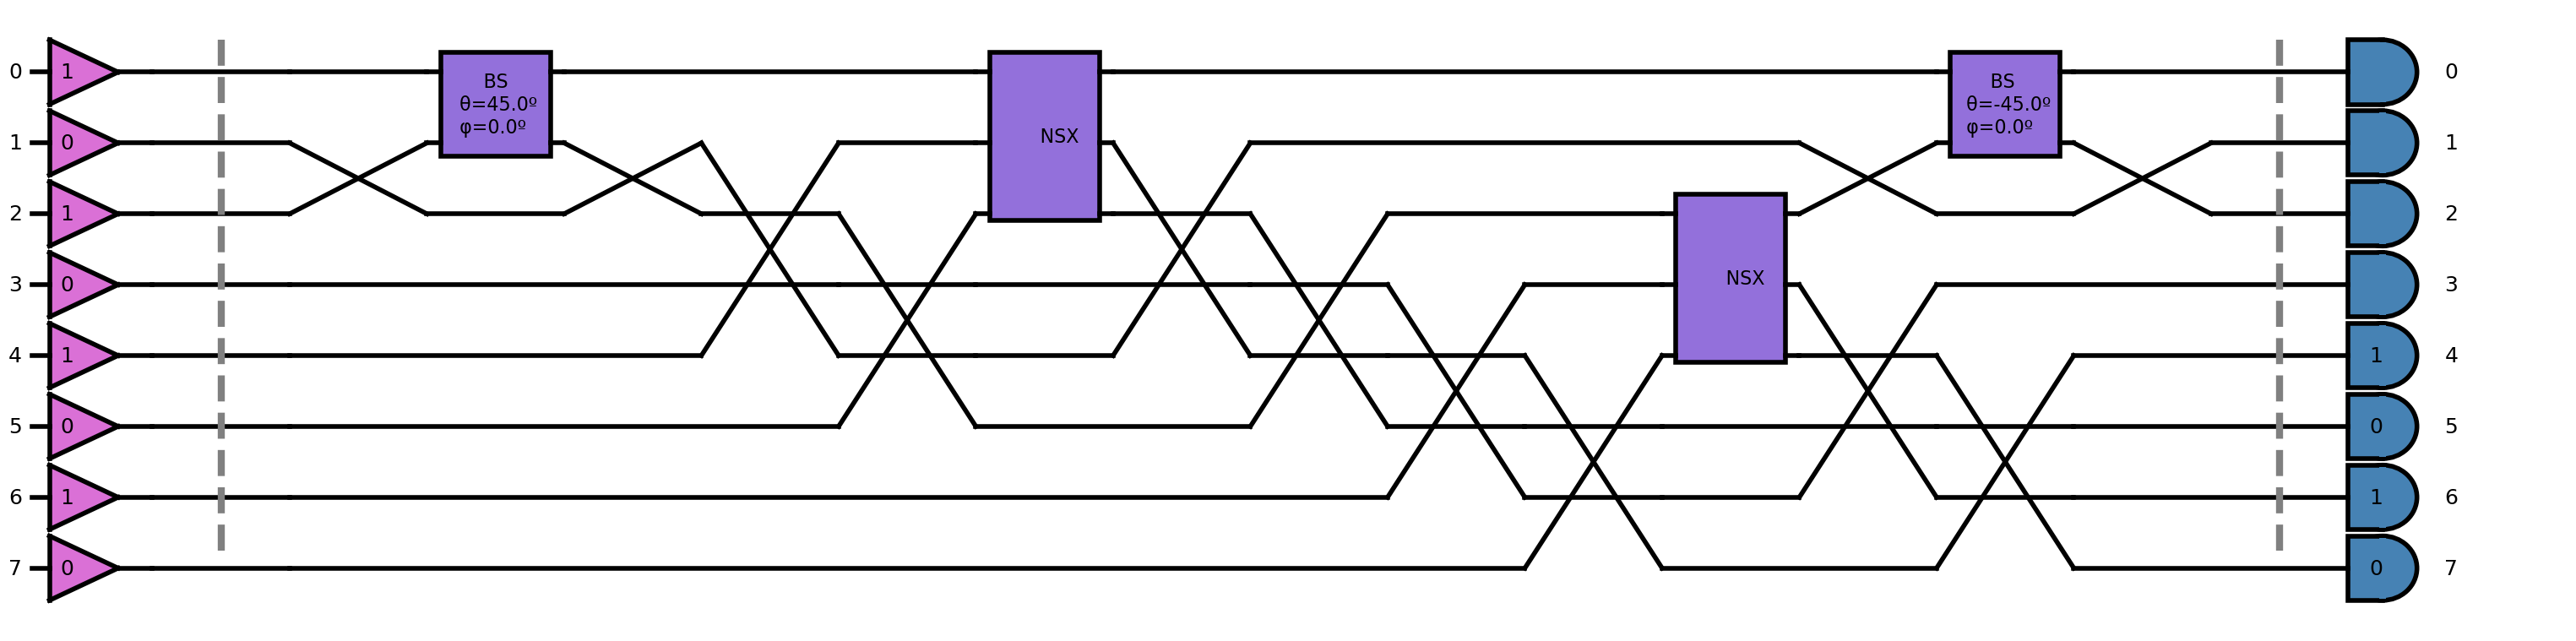

In [4]:
csign10=soqcs.qodev(3,8);
csign10.qubits([1,1],qmap)
csign10.add_photons(1,4)
csign10.add_photons(0,5)
csign10.add_photons(1,6)
csign10.add_photons(0,7)
csign10 << csign
csign10.show(depth=20)

Simulation and plot of the output. Note that we are interested in the output state instead of the outpur probability because the CSign gate acts on the phase of the state. <br>
<br>
**Warning!:** Also note that in general the result of a post-selection is a distribution of probabilities. In this case we can obtain a state because is a single ket post-selection in an ideal circuit.

In [5]:
raw_output=sim.run_st(csign10.input(),csign10.circuit())
output=csign10.apply_condition(raw_output)
encoded=output.encode(qmap,csign10.circuit())
encoded.prnt_state(column=1)

 | 1, 1 >: -0.25000000 + 0.00000000 j



### Example with | 0, 0 > + | 0, 1 > + | 1, 0 > + | 1, 1 > input.

Here we present the output for an input made of a linear superposition of states.

In [6]:
qubit= soqcs.state(2)
qubit.add_ket(0.5,[0,0])
qubit.add_ket(0.5,[0,1])
qubit.add_ket(0.5,[1,0])
qubit.add_ket(0.5,[1,1])
raw_output=sim.run_st(qubit.decode(qmap,[1,0,1,0],csign10.circuit()),csign10.circuit())
output=csign10.apply_condition(raw_output)
encoded=output.encode(qmap,csign10.circuit())
encoded.normalize()
encoded.prnt_state(column=1)

 | 0, 0 >:  0.50000000 + 0.00000000 j
 | 0, 1 >:  0.50000000 + 0.00000000 j
 | 1, 0 >:  0.50000000 + 0.00000000 j
 | 1, 1 >: -0.50000000 + 0.00000000 j



<b> THIS CODE IS PART OF SOQCS </p>
<b>Copyright:</b>
Copyright © 2023 National University of Ireland Maynooth, Maynooth University. All rights reserved.
The contents and use of this document and the related code are subject to the licence terms detailed in <a href="./assets/LICENCE.TXT">LICENCE.txt</a>